In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
# create the dataset
X, y = make_regression(n_samples=200, n_features=1,
                       n_informative=1, random_state=27, noise=35)

print('The shape of X is', X.shape)
print('The shape of y is', y.shape)

The shape of X is (200, 1)
The shape of y is (200,)


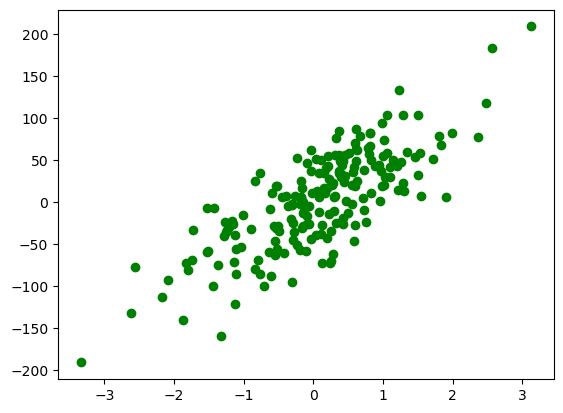

In [3]:
# plot the data

plt.scatter(X, y, color='green')
plt.show()

In [4]:
# do train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
# fit the linear regression

lr = LinearRegression()

# fit on the data
lr.fit(X_train, y_train)

# do predictions on the test data
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# calculate r2 score
print('The r2 score on the train data is', r2_score(y_train, y_pred_train))
print('The r2 score on the test data is', r2_score(y_test, y_pred_test))

# print the parameters
print('Coefficients', lr.coef_[0])
print('Intercept', lr.intercept_)

The r2 score on the train data is 0.5846992436759911
The r2 score on the test data is 0.650108701600583
Coefficients 43.903346707237404
Intercept -1.6688472569342139


In [6]:
# create new data that has 5 input columns

X, y = make_regression(n_samples=200, n_features=5,
                       n_informative=3, noise=37, random_state=87)

# do train test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(160, 5)
(40, 5)


In [7]:
# train the linear regression on this new data

linear_reg = LinearRegression()

# fit on the train data
linear_reg.fit(X_train, y_train)

# predict on the test data
y_pred = linear_reg.predict(X_test)

# get the r2 scores
print('The score is ', r2_score(y_test, y_pred))

# get the parameters values
print('The coef values are', linear_reg.coef_)
print('The intercept value is ', linear_reg.intercept_)

The score is  0.8206982619251723
The coef values are [ 3.96126613 -3.85977926 66.56006742  3.34038837 67.44698854]
The intercept value is  -2.3583434670932704


In [8]:
# create the class for Batch gradient descent

class GD_Regressor:

    def __init__(self, epochs=100, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # initialize the weights and intercept
        self.intercept_ = 0
        self.coef_ = np.ones(shape=X.shape[1])

        # for n number of epochs
        for i in range(self.epochs):

            # do predictions
            y_pred = np.dot(X, self.coef_) + self.intercept_
            resid = y - y_pred

            # update the intercept
            intercept_der = -2 * np.mean(resid)
            self.intercept_ = self.intercept_ - (self.learning_rate * intercept_der)

            # update the coef
            coef_der = (-2 * (np.dot(resid, X))) / X.shape[0]
            self.coef_ = self.coef_ - (self.learning_rate * coef_der)

    def predict(self, X):
        y_pred = np.dot(X, self.coef_) + self.intercept_
        return y_pred

    def score(self, y_true, y_pred):
        score = r2_score(y_true=y_true, y_pred=y_pred)
        return score

In [9]:
# train the model

gd_reg = GD_Regressor(epochs=250, learning_rate=0.02)

gd_reg.fit(X_train, y_train)

# get predictions
y_pred = gd_reg.predict(X_test)

# get the score
score = gd_reg.score(y_test, y_pred)

score

0.8206636743838617

In [10]:
# get the parameters values
print('The coef values are', gd_reg.coef_)
print('The intercept value is ', gd_reg.intercept_)

The coef values are [ 3.97111023 -3.87069173 66.54638486  3.32427241 67.43856324]
The intercept value is  -2.3542540192368415


In [39]:
# create the class for Stochastic gradient descent

class SGD_Regressor:

    def __init__(self, epochs=100, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # initialize the weights and intercept
        self.intercept_ = 0
        self.coef_ = np.ones(shape=X.shape[1])

        # number of rows in the data
        n = X.shape[0]

        # for n number of epochs
        for i in range(self.epochs):
            for j in range(n):
                # select the random row from the data
                idx = np.random.randint(low=0,high=n-1)
                # do predictions
                y_pred = np.dot(X[idx], self.coef_) + self.intercept_
                resid = y[idx] - y_pred

                # update the intercept
                intercept_der = -2 * resid
                self.intercept_ = self.intercept_ - (self.learning_rate * intercept_der)

                # update the coef
                coef_der = -2 * (np.dot(resid, X[idx]))
                self.coef_ = self.coef_ - (self.learning_rate * coef_der)

    def predict(self, X):
        y_pred = np.dot(X, self.coef_) + self.intercept_
        return y_pred

    def score(self, y_true, y_pred):
        score = r2_score(y_true=y_true, y_pred=y_pred)
        return score

In [43]:
# train the model

sgd_reg = SGD_Regressor(epochs=220,learning_rate=0.02)

sgd_reg.fit(X_train, y_train)

# get predictions
y_pred = sgd_reg.predict(X_test)

# get the score
score = sgd_reg.score(y_test, y_pred)

score

0.8537744600980781

In [44]:
# get the parameters values
print('The coef values are', sgd_reg.coef_)
print('The intercept value is ', sgd_reg.intercept_)

The coef values are [-3.83684137 -3.90356721 60.95818635  5.09823141 60.29582475]
The intercept value is  4.2798010772782105


In [49]:
# create the class for mini batch gradient descent

class MBGD_Regressor:

    def __init__(self, epochs=100, learning_rate=0.01,batch_size=32):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # initialize the weights and intercept
        self.intercept_ = 0
        self.coef_ = np.ones(shape=X.shape[1])

        # number of batches
        batch_num = (X.shape[0]//self.batch_size) + 1

        # for n number of epochs
        for i in range(self.epochs):
            for j in range(batch_num):
                # select in the index for the rows of data
                idx = np.random.randint(low=0,high=X.shape[0]-1,size=self.batch_size)

                # do predictions
                y_pred = np.dot(X[idx], self.coef_) + self.intercept_
                resid = y[idx] - y_pred

                # update the intercept
                intercept_der = -2 * np.mean(resid)
                self.intercept_ = self.intercept_ - (self.learning_rate * intercept_der)

                # update the coef
                coef_der = (-2 * (np.dot(resid, X[idx]))) / self.batch_size
                self.coef_ = self.coef_ - (self.learning_rate * coef_der)

    def predict(self, X):
        y_pred = np.dot(X, self.coef_) + self.intercept_
        return y_pred

    def score(self, y_true, y_pred):
        score = r2_score(y_true=y_true, y_pred=y_pred)
        return score

In [54]:
# train the model

mbgd_reg = MBGD_Regressor(epochs=300,learning_rate=0.02,batch_size=128)

mbgd_reg.fit(X_train, y_train)

# get predictions
y_pred = mbgd_reg.predict(X_test)

# get the score
score = mbgd_reg.score(y_test, y_pred)

score

0.8217081316787038

In [55]:
# get the parameters values
print('The coef values are', sgd_reg.coef_)
print('The intercept value is ', sgd_reg.intercept_)

The coef values are [-3.83684137 -3.90356721 60.95818635  5.09823141 60.29582475]
The intercept value is  4.2798010772782105
